Importing useful libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


loading training and testing data...

In [2]:
data = pd.read_csv('binary_classification_train.csv')
data_test = pd.read_csv('binary_classification_test.csv')
print(data.head())


   1-ID  Feature_1   Feature_2   Feature_3   Feature_4   Feature_5  \
0     1 -36.963099  -15.014703   87.100435  101.523360   82.106571   
1     2 -43.715674   18.847116   89.543406  -71.319314   35.597052   
2     3 -30.737550  -63.729643  106.081332   81.773948  112.769976   
3     4 -27.674757 -118.869495  135.605213   99.130189   50.947548   
4     5 -28.654141  -77.746597   85.215365   50.374774   79.763207   

    Feature_6  Feature_7  Feature_8   Feature_9  ...  Feature_12  Feature_13  \
0  -10.956180   0.592326 -51.919028  -90.650434  ...  -81.183744   13.101921   
1  126.358570 -29.837495 -40.473764  -94.079238  ...  -37.848260    7.457352   
2  -12.425351 -29.913286 -41.771200   16.424511  ... -106.610289    5.930143   
3  -63.704785  -7.353057 -58.140229  -80.209027  ... -149.056417    3.893419   
4  -32.703048 -28.152031 -63.994794 -153.566789  ... -102.731465   11.160205   

   Feature_14  Feature_15  Feature_16  Feature_17  Feature_18  Feature_19  \
0   18.051450  -40.60

Extracting data and normalising i

In [ ]:

x = data.iloc[:,1:21]
x = (x-x.mean())/(x.std())
print(x.head())
y = data.iloc[0:,21]
print(y)



class_counts = pd.Series(y).value_counts(normalize = True) 
print(class_counts)  



   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0  -0.908181   1.579658  -0.117235   1.434109  -0.193738  -0.727348   
1  -2.350113   2.322732  -0.054594  -0.233848  -1.902018   0.636067   
2   0.421210   0.510641   0.369459   1.243524   0.932519  -0.741935   
3   1.075233  -0.699365   1.126488   1.411014  -1.338199  -1.251095   
4   0.866097   0.203049  -0.165571   0.940518  -0.279809  -0.943275   

   Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  \
0   1.075587  -1.250042   0.781382    0.858231   -2.089579   -0.428789   
1  -0.610987  -0.094484   0.720290   -0.643393    0.352545    0.531547   
2  -0.615188  -0.225478   2.689185   -2.067498   -1.189093   -0.992254   
3   0.635214  -1.878159   0.967422    1.282044   -0.332541   -1.932881   
4  -0.517571  -2.469258  -0.339627    0.461455   -0.697679   -0.906297   

   Feature_13  Feature_14  Feature_15  Feature_16  Feature_17  Feature_18  \
0    0.601514    0.728394   -1.207400   -0.274070  

Spilliting for cross validation

In [4]:
x_train = x.values
print(x.shape)
y_train = y.values
m = x_train.shape[0]
n = int(0.2*m)
x_test = x_train[0:n,:]
x_train = x_train[n:,:]
y_test = y_train[0:n]
y_train = y_train[n:]
print("Training set has {} samples.".format(x_train.shape[0]))

(48000, 20)
Training set has 38400 samples.


Initializing weight and bias 

In [5]:
w_in = np.zeros(x_train.shape[1])
b_in = 0
print(w_in.shape)


(20,)


Defining cost function 

In [6]:
def cost_function(x,y,w,b,lambdaa):
    z = np.dot(x,w) + b
    fb = 1/(1+ np.exp(-z))
    cost = (1/m)*((np.sum(-y*np.log(fb) - (1-y)*np.log(1-fb))) + lambdaa*np.sum(np.square(w)))
    return cost
def predict(x,w,b):
    z = np.dot(x,w) + b
    f = 1/(1+np.exp(-z))
    a = (f>0.5)
    return (a.astype(int))

gradient and gradient descent 

In [7]:

def gradient_descent(x,y,w_in,b_in,learning_rate,iteration,lambdaa):
    J_history = []
    Accuracy_history = []
    W = []
    w = np.copy(w_in)
    b = b_in
    m = x.shape[0]
    n = len(w)
    for i in range(iteration):
        z = np.dot(x,w) + b
        f_b  =  (1/(1 + np.exp(-z)))
        dw = (1/m)*(np.dot(x.T,f_b-y) + (lambdaa)*np.sum(w))
        db = (1/m)*(np.sum(f_b-y))
        
        w-= learning_rate * dw
        b-= learning_rate * db
        if i< iteration:
            J_history.append(cost_function(x,y,w,b,lambdaa))
            y_pred = predict(x,w,b)
            acc = (np.mean(y_pred == y)*100)
            Accuracy_history.append(acc)

        if (i%(iteration/10) == 0):
            W.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}, accuracy : {acc}   ")
        
    return w, b, J_history, W   



    


Defining hyperparameters for the model and calling gradient descent

In [8]:
learning_rate = 0.1
iteration = 100
lambdaa = 1
wf,bf,J,W = gradient_descent(x_train,y_train,w_in,b_in,learning_rate = 0.1,iteration = 500,lambdaa = 0.001)
print(wf)
print(bf)



Iteration    0: Cost     0.53, accuracy : 90.79166666666667   
Iteration   50: Cost     0.25, accuracy : 92.88541666666667   
Iteration  100: Cost     0.22, accuracy : 93.22135416666667   
Iteration  150: Cost     0.21, accuracy : 93.3671875   
Iteration  200: Cost     0.20, accuracy : 93.4296875   
Iteration  250: Cost     0.20, accuracy : 93.453125   
Iteration  300: Cost     0.20, accuracy : 93.4921875   
Iteration  350: Cost     0.20, accuracy : 93.49739583333333   
Iteration  400: Cost     0.20, accuracy : 93.52604166666667   
Iteration  450: Cost     0.20, accuracy : 93.55208333333334   
[ 1.52689254e-02 -2.57025596e-02  9.18580072e-04 -5.71645476e-01
  1.55756741e-02  1.58067406e+00  2.23785651e-02  1.25358866e-02
  3.04450085e-01  3.16830045e-02 -4.26282776e-02 -1.04848085e-02
 -2.28073819e-02  3.32116637e-01  6.58446691e-01 -4.97204726e-01
  8.47422536e-01 -4.94140796e-01 -1.83274772e-01 -2.78799396e-02]
-1.2427009617580915


Plotting cost functions vs iteration

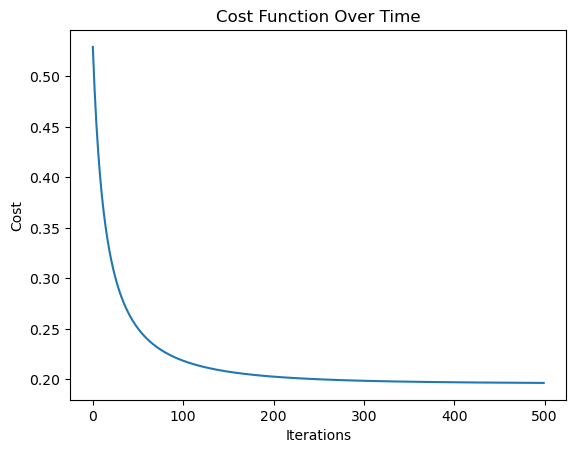

In [10]:
plt.plot(J)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Time')
plt.show()

calculating accuracy and f1_score

In [11]:

     
y = predict (x_test,wf,bf)
print(y)    
accuracy = np.mean(y_test == y)
print("accuracy On cross validation set : ",accuracy * 100)
p = np.sum((y_test == 1) & (y == 1))/(np.sum((y_test == 1) & (y == 1)) + np.sum((y_test == 0) & (y == 1)))  # precision
r = np.sum((y_test == 1) & (y == 1))/(np.sum((y_test == 1) & (y == 1)) + np.sum((y_test == 1) & (y == 0)))  # recall 



print(p)
print(r)

y_t = predict(x_train,wf,bf)
f1_score = 2*(p * r)/(p + r)  # f1_score 
print(f1_score)
accuracy = np.mean(y_train == y_t)
print("accuracy On training validation set : ",accuracy * 100)

[0 1 0 ... 0 1 0]
accuracy On cross validation set :  93.14583333333334
0.9229957805907173
0.8567232375979112
0.8886255924170616
accuracy On training validation set :  93.54947916666667


predicting for testing data 

In [12]:
x_t = data_test.iloc[:,1:]

x_t = (x_t - x_t.mean())/(x_t.std())
xt_test = x_t.values
print(xt_test.shape)
y = predict (xt_test,wf,bf)
print(y)

(12000, 20)
[0 0 0 ... 0 1 0]
